<a href="https://colab.research.google.com/github/Viny2030/UNED/blob/main/practica02_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://corenlp.run/


<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/NLP/1_Introduccion/Introduccion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

In [ ]:
print(" : Instalacion de Stanza")

 : Instalacion de Stanza


In [ ]:
!pip install stanza

In [ ]:
print(" : descarga de bibliotecas adicionales")

 : descarga de bibliotecas adicionales


In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
(" : Importacion de Stanza y descarga de stanza en ingles")

' : Importacion de Stanza y descarga de stanza en ingles'

In [ ]:
import stanza

# Descarga el pipeline para el español
stanza.download('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
!pip install --upgrade stanza

In [ ]:
print(" : 4.1-Lema de las palabras(analisis lexico y morfologico) del archivo input.txt, y conversion a archivo json")


 : 4.1-Lema de las palabras(analisis lexico y morfologico) del archivo input.txt, y conversion a archivo json


In [ ]:
####Obteniendo el lema de las palabras##
from stanza.pipeline.core import Pipeline
import json

# Cargar el modelo de Stanza (puede tardar unos segundos)
nlp = Pipeline('en')

# Lista de oraciones
sentences = [
    "Jane bought me these books.",
    "Jane bought a book for me.",
    "She dropped a line to him. Thank you.",
    "She sleeps.",
    "I sleep a lot.",
    "I was born in Madrid.",
    "the cat was chased by the dog.",
    "I was born in Madrid during 1995.",
    "Out of all this , something good will come.",
    "Susan left after the rehearsal. She did it well.",
    "She sleeps during the morning, but she sleeps."
]

# Especificar el nombre del archivo JSON
output_file = "resultados_lexico.json"

# Procesar las oraciones con Stanza
for sentence in sentences:
    doc = nlp(sentence)

    # Imprimir la salida en consola
    print(f"Sentence: {sentence}")
    for word in doc.sentences[0].words:
        print(f"Word: {word.text}\tLemma: {word.lemma}\tPOS: {word.upos}")
    print("\n")

    # Crear un diccionario para la salida JSON
    json_data = {
        "sentence": sentence,
        "words": [
            {"word": word.text, "lemma": word.lemma, "pos": word.upos}
            for word in doc.sentences[0].words
        ]
    }

    # Guardar los resultados en el archivo JSON
    with open(output_file, 'a') as f:
        json.dump(json_data, f)
        f.write('\n')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence: Jane bought me these books.
Word: Jane	Lemma: Jane	POS: PROPN
Word: bought	Lemma: buy	POS: VERB
Word: me	Lemma: I	POS: PRON
Word: these	Lemma: this	POS: DET
Word: books	Lemma: book	POS: NOUN
Word: .	Lemma: .	POS: PUNCT


Sentence: Jane bought a book for me.
Word: Jane	Lemma: Jane	POS: PROPN
Word: bought	Lemma: buy	POS: VERB
Word: a	Lemma: a	POS: DET
Word: book	Lemma: book	POS: NOUN
Word: for	Lemma: for	POS: ADP
Word: me	Lemma: I	POS: PRON
Word: .	Lemma: .	POS: PUNCT


Sentence: She dropped a line to him. Thank you.
Word: She	Lemma: she	POS: PRON
Word: dropped	Lemma: drop	POS: VERB
Word: a	Lemma: a	POS: DET
Word: line	Lemma: line	POS: NOUN
Word: to	Lemma: to	POS: ADP
Word: him	Lemma: he	POS: PRON
Word: .	Lemma: .	POS: PUNCT


Sentence: She sleeps.
Word: She	Lemma: she	POS: PRON
Word: sleeps	Lemma: sleep	POS: VERB
Word: .	Lemma: .	POS: PUNCT


Sentence: I sleep a lot.
Word: I	Lemma: I	POS: PRON
Word: sleep	Lemma: sleep	POS: VERB
Word: a	Lemma: a	POS: DET
Word: lot	Lemma: lot	PO

In [ ]:
print(" : 4.2.Identificando entidades nombradas en input.txt, y conversion a archivo json")

 : 4.2.Identificando entidades nombradas en input.txt, y conversion a archivo json


In [ ]:
###identificando las entidades nombradas###
import stanza

# Download the English model with NER
stanza.download('en', processors='tokenize,mwt,pos,lemma,ner')

# Initialize the pipeline
nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma,ner')

# Process the text
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps.""")

entities = []

for sent in doc.sentences:
    for ent in sent.ents:
        entity_dict = {"text": ent.text, "type": ent.type}
        entities.append(entity_dict)

# Convertir la lista de entidades a JSON
json_data = json.dumps(entities, indent=4)

# Imprimir o guardar el JSON
print(json_data)

# Para guardar en un archivo:
with open('entities.json', 'w') as f:
    f.write(json_data)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package                   |
-----------------------------------------------
| tokenize        | combined                  |
| mwt             | combined                  |
| pos             | combined_charlm           |
| lemma           | combined_nocharlm         |
| ner             | ontonotes-ww-multi_charlm |
| backward_charlm | 1billion                  |
| pretrain        | conll17                   |
| forward_charlm  | 1billion                  |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/mwt/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/combined_nocharlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/ner/ontonotes-ww-multi_charl

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| lemma     | combined_nocharlm         |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "text": "Jane",
        "type": "PERSON"
    },
    {
        "text": "Jane",
        "type": "PERSON"
    },
    {
        "text": "Madrid",
        "type": "GPE"
    },
    {
        "text": "Madrid",
        "type": "GPE"
    },
    {
        "text": "1995",
        "type": "DATE"
    },
    {
        "text": "Susan",
        "type": "PERSON"
    }
]


In [ ]:
print(" : 4.3.Realizando un análisis sintáctico de dependencias del archivo input.txt, y conversion a archivo json")

 : 4.3.Realizando un análisis sintáctico de dependencias del archivo input.txt, y conversion a archivo json


In [ ]:
import stanza
import json

def analyze_sentence(sentence):
    """
    Realiza el análisis sintáctico de una oración utilizando Stanza.

    Args:
        sentence: La oración a analizar.

    Returns:
        Un diccionario que contiene la oración y una lista de tuplas,
        donde cada tupla representa una relación de dependencia
        (palabra cabeza, palabra dependiente, etiqueta de la relación).
    """

    nlp = stanza.Pipeline('en')
    doc = nlp(sentence)

    dependencies = []

    for sent in doc.sentences:
        for word in sent.words:
            head_index = word.head - 1  # Ajustar por indexación basada en 0
            if head_index >= 0:  # Manejar el nodo raíz (índice de cabeza 0)
                head_word = sent.words[head_index].text
                dependencies.append((head_word, word.text, word.deprel))

    return {"sentence": sentence, "dependencies": dependencies}

if __name__ == "__main__":
    sentences = [
        "Jane bought me these books.",
        "Jane bought a book for me.",
        "She dropped a line to him. Thank you.",
        "She sleeps.",
        "I sleep a lot.",
        "I was born in Madrid.",
        "the cat was chased by the dog.",
        "I was born in Madrid during 1995.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal. She did it well.",
        "She sleeps during the morning, but she sleeps."
    ]

    output = []
    for sentence in sentences:
        output.append(analyze_sentence(sentence))

    # Imprimir la salida
    for entry in output:
        print(f"Sentence: {entry['sentence']}")
        print("Dependencies:")
        for dep in entry['dependencies']:
            print(f"  - {dep[0]} --({dep[2]})--> {dep[1]}")
        print()

    # Guardar la salida en un archivo JSON
    with open("dependency_analysis.json", "w") as f:
        json.dump(output, f, indent=4)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence: Jane bought me these books.
Dependencies:
  - bought --(nsubj)--> Jane
  - bought --(iobj)--> me
  - books --(det)--> these
  - bought --(obj)--> books
  - bought --(punct)--> .

Sentence: Jane bought a book for me.
Dependencies:
  - bought --(nsubj)--> Jane
  - book --(det)--> a
  - bought --(obj)--> book
  - me --(case)--> for
  - bought --(obl)--> me
  - bought --(punct)--> .

Sentence: She dropped a line to him. Thank you.
Dependencies:
  - dropped --(nsubj)--> She
  - line --(det)--> a
  - dropped --(obj)--> line
  - him --(case)--> to
  - dropped --(obl)--> him
  - dropped --(punct)--> .
  - Thank --(obj)--> you
  - Thank --(punct)--> .

Sentence: She sleeps.
Dependencies:
  - sleeps --(nsubj)--> She
  - sleeps --(punct)--> .

Sentence: I sleep a lot.
Dependencies:
  - sleep --(nsubj)--> I
  - lot --(det)--> a
  - sleep --(obl:unmarked)--> lot
  - sleep --(punct)--> .

Sentence: I was born in Madrid.
Dependencies:
  - born --(nsubj:pass)--> I
  - born --(aux:pass)--> wa

In [ ]:
print(" : 4.3.1-Realizando un análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones NV sujeto-verbo (cuando no haya objeto directo)- correspondientes a las estructuras: nombradas en input.txt, y conversion a archivo json")

 : 4.3.1-Realizando un análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones NV sujeto-verbo (cuando no haya objeto directo)- correspondientes a las estructuras: nombradas en input.txt, y conversion a archivo json


In [ ]:
import stanza
import json

def extract_nv_propositions(sentence):
    """
    Extracts NV propositions (Subject-Verb) from a given sentence.

    Args:
        sentence: The input sentence.

    Returns:
        A list of NV propositions, where each proposition is a tuple
        containing the subject and verb.
    """

    nlp = stanza.Pipeline('en')
    doc = nlp(sentence)
    propositions = []

    for sent in doc.sentences:
        subject = None
        verb = None
        obj = None  # Check for object to filter NVN cases

        for word in sent.words:
            if word.deprel == "nsubj":
                subject = word.text
            elif word.upos == "VERB":
                verb = word.text
            elif word.deprel == "obj":
                obj = word.text  # If object found, set obj to True

        if subject and verb and not obj:  # Check if object is not found
            propositions.append((subject, verb))

    return propositions

if __name__ == "__main__":
    sentences = [
        "Jane bought me these books.",
        "Jane bought a book for me.",
        "She dropped a line to him. Thank you.",
        "She sleeps.",
        "I sleep a lot.",
        "I was born in Madrid.",
        "the cat was chased by the dog.",
        "I was born in Madrid during 1995.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal. She did it well.",
        "She sleeps during the morning, but she sleeps."
    ]

    output = []
    for sentence in sentences:
        propositions = extract_nv_propositions(sentence)
        output.append({"sentence": sentence, "propositions": propositions})

    # Imprimir la salida
    for entry in output:
        print(f"Sentence: {entry['sentence']}")
        for prop in entry['propositions']:
            print(f"  - Proposition: {prop[0]} {prop[1]}")
        print()

    # Guardar la salida en un archivo JSON
    with open("nv_propositions.json", "w") as f:
        json.dump(output, f, indent=4)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence: Jane bought me these books.

Sentence: Jane bought a book for me.

Sentence: She dropped a line to him. Thank you.

Sentence: She sleeps.
  - Proposition: She sleeps

Sentence: I sleep a lot.
  - Proposition: I sleep

Sentence: I was born in Madrid.

Sentence: the cat was chased by the dog.

Sentence: I was born in Madrid during 1995.

Sentence: Out of all this , something good will come.
  - Proposition: something come

Sentence: Susan left after the rehearsal. She did it well.
  - Proposition: Susan left

Sentence: She sleeps during the morning, but she sleeps.
  - Proposition: she sleeps



In [ ]:
print(" : 4.4.Realizando un análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones NVN sujeto-verbo-objeto (cuando haya objeto directo- correspondientes a las estructuras: nombradas en input.txt, y conversion a archivo json")

In [ ]:
import stanza
import json

def extract_nvn_propositions(sentence):
    """
    Extracts NVN propositions (Subject-Verb-Object) from a given sentence.

    Args:
        sentence: The input sentence.

    Returns:
        A list of NVN propositions, where each proposition is a tuple
        containing the subject, verb, and object.
    """

    nlp = stanza.Pipeline('en')
    doc = nlp(sentence)
    propositions = []

    for sent in doc.sentences:
        subject = None
        verb = None
        obj = None

        for word in sent.words:
            if word.deprel == "nsubj":
                subject = word.text
            elif word.upos == "VERB":
                verb = word.text
            elif word.deprel == "obj":
                obj = word.text

        if subject and verb and obj:
            propositions.append((subject, verb, obj))

    return propositions

if __name__ == "__main__":
    sentences = [
        "Jane bought me these books.",
        "Jane bought a book for me.",
        "She dropped a line to him. Thank you.",
        "She sleeps.",
        "I sleep a lot.",
        "I was born in Madrid.",
        "the cat was chased by the dog.",
        "I was born in Madrid during 1995.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal. She did it well.",
        "She sleeps during the morning, but she sleeps."
    ]

    output = []
    for sentence in sentences:
        propositions = extract_nvn_propositions(sentence)
        output.append({"sentence": sentence, "propositions": propositions})

    # Imprimir la salida
    for entry in output:
        print(f"Sentence: {entry['sentence']}")
        for prop in entry['propositions']:
            print(f"  - Proposition: {prop[0]} {prop[1]} {prop[2]}")
        print()

    # Guardar la salida en un archivo JSON
    with open("nvn_propositions.json", "w") as f:
        json.dump(output, f, indent=4)

In [ ]:
print("E: 4.5.Realizando un análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones Todas las ocurrencias NVPN sujeto-verbo-preposición-complemento (una por cada complemento)- correspondientes a las estructuras: nombradas en input.txt, y conversion a archivo json")

In [ ]:
import stanza
import json

def extract_nvpn_propositions(sentence):
    """
    Extracts NVNPN propositions (Subject-Verb-Preposition-Complement) from a given sentence.

    Args:
        sentence: The input sentence.

    Returns:
        A list of NVNPN propositions, where each proposition is a tuple
        containing the subject, verb, preposition, and complement.
    """

    nlp = stanza.Pipeline('en')
    doc = nlp(sentence)
    propositions = []

    for sent in doc.sentences:
        subject = None
        verb = None
        preposition = None
        complement = None

        for word in sent.words:
            if word.deprel == "nsubj":
                subject = word.text
            elif word.upos == "VERB":
                verb = word.text
            elif word.upos == "ADP":
                preposition = word.text
            elif word.deprel == "pobj":
                complement = word.text

        if subject and verb and preposition and complement:
            propositions.append((subject, verb, preposition, complement))

    return propositions

if __name__ == "__main__":
    sentences = [
        "Jane bought me these books.",
        "Jane bought a book for me.",
        "She dropped a line to him. Thank you.",
        "She sleeps.",
        "I sleep a lot.",
        "I was born in Madrid.",
        "the cat was chased by the dog.",
        "I was born in Madrid during 1995.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal. She did it well.",
        "She sleeps during the morning, but she sleeps."
    ]

    output = []
    for sentence in sentences:
        propositions = extract_nvpn_propositions(sentence)
        output.append({"sentence": sentence, "propositions": propositions})

    # Imprimir la salida
    for entry in output:
        print(f"Sentence: {entry['sentence']}")
        for prop in entry['propositions']:
            print(f"  - Proposition: {prop[0]} {prop[1]} {prop[2]} {prop[3]}")
        print()

    # Guardar la salida en un archivo JSON
    with open("nvpn_propositions.json", "w") as f:
        json.dump(output, f, indent=4)

In [ ]:
print(" :4.6 Debemos contar proposiciones (ej. \"she, do, it\"), archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json ")

In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y contarlas
def extraer_proposiciones_y_contar(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            proposiciones.append(word.text)
    return proposiciones, len(proposiciones)

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones, num_proposiciones = extraer_proposiciones_y_contar(sentence)
    resultados.append({
        "sentence": sentence.text,
        "propositions": proposiciones,
        "num_propositions": num_proposiciones
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON (opcional)
with open("proposiciones_contadas.json", "w") as f:
     json.dump(resultados, f, indent=4)

In [ ]:
print(": 5.En el proceso, sustituye todas las palabras comunes por su lema (e.g. ran --> run, runners --> runner), y conversion a archivo json")

In [ ]:
import stanza
import json

def analyze_dependency_graph(text, include_ner=True):
  """
  Analyzes the dependency graph of a given text using Stanza,
  substituting words by their lemma or named entity category.

  Args:
      text: The input text.
      include_ner (bool, optional): Whether to include Named Entity Recognition (NER). Defaults to True.

  Returns:
      A list of dictionaries, where each dictionary represents a dependency relation.
  """

  # Download the English model with optional NER
  stanza.download('en', processors='tokenize,mwt,pos,lemma,depparse' + (',ner' if include_ner else ''))

  # Create a pipeline explicitly including NER if desired
  nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma' + (',ner' if include_ner else ''))

  doc = nlp(text)
  dependencies = []

  for sentence in doc.sentences:
    for word in sentence.words:
      # Check if NER is enabled and the word has an entity type
      if include_ner and hasattr(word, 'ent_type') and word.ent_type != "O":
        word_text = word.ent_type  # Use entity type for named entities (except 'O')
      else:
        word_text = word.lemma  # Use lemma by default

      dependency = {
          "word": word_text,
          "pos": word.upos,
          "lemma": word.lemma,
          "head": word.head,
          "deprel": word.deprel
      }
      dependencies.append(dependency)

  return dependencies

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

dependency_graph = analyze_dependency_graph(text)

# Save to JSON file
with open('dependency_graph_ner_lemmas.json', 'w') as f:
    json.dump(dependency_graph, f, indent=4)

print(dependency_graph)

In [ ]:
print(": 6.Opcionalmente, sustituye todas las entidades nombradas por su categoría (e.g. John Smith --> PERSON), y conversion a archivo json ")

In [ ]:
import stanza
import json

def analyze_dependency_graph(text):
  """
  Analyzes the dependency graph of a given text using Stanza,
  substituting named entities by their category.

  Args:
      text: The input text.

  Returns:
      A list of dictionaries, where each dictionary represents a dependency relation.
  """

  # Download the English model with NER
  stanza.download('en', processors='tokenize,mwt,pos,lemma,depparse,ner')

  # Create a pipeline including NER
  nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma,ner,depparse')

  doc = nlp(text)
  dependencies = []

  for sentence in doc.sentences:
    for word in sentence.words:
      # Check if NER is enabled and the word has an entity type
      if hasattr(word, 'ent_type') and word.ent_type != "O":
        word_text = word.ent_type  # Use entity type for all named entities (except 'O')
      else:
        word_text = word.text  # Use original text for non-named entities

      dependency = {
          "word": word_text,
          "pos": word.upos,
          "lemma": word.lemma,
          "head": word.head,
          "deprel": word.deprel
      }
      dependencies.append(dependency)

  return dependencies

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

dependency_graph = analyze_dependency_graph(text)

# Save to JSON file
with open('dependency_graph_ner_categories.json', 'w') as f:
    json.dump(dependency_graph, f, indent=4)

print(dependency_graph)

In [ ]:
print(" : 7.Finalmente, ordena las proposiciones obtenidas de mayor a menor frecuencia y conversion a archivo json  ")

In [ ]:
import stanza

def analyze_dependency_graph(text):
  """
  Analiza el grafo de dependencias de un texto dado utilizando Stanza,
  sustituyendo las entidades nombradas por su categoría (si está habilitado).

  Args:
      text: El texto de entrada.

  Returns:
      Una lista de diccionarios, donde cada diccionario representa una relación de dependencia.
  """

  # Descarga el modelo de inglés con los procesadores necesarios
  stanza.download('en', processors='tokenize,mwt,pos,lemma,depparse')

  # Crea el pipeline de procesamiento
  nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma,depparse')

  doc = nlp(text)
  dependencies = []

  for sentence in doc.sentences:
    for word in sentence.words:
      dependency = {
          "word": word.text,  # Usamos word.text en lugar de word.lemma o ent_type
          "pos": word.upos,
          "head": word.head,
          "deprel": word.deprel
      }
      dependencies.append(dependency)

  return dependencies

def find_most_frequent_propositions(dependencies):
  """
  Encuentra las proposiciones más frecuentes en el grafo de dependencias.

  Args:
      dependencies: Lista de diccionarios representando las relaciones de dependencia.

  Returns:
      Una lista de tuplas (proposición, frecuencia), ordenada de mayor a menor frecuencia.
  """
  propositions = []
  for dependency in dependencies:
    propositions.append((dependency['deprel'], dependency['pos']))

  prop_counts = {}
  for prop in propositions:
    prop_counts[prop] = prop_counts.get(prop, 0) + 1

  sorted_props = sorted(prop_counts.items(), key=lambda x: x[1], reverse=True)
  return sorted_props

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

dependencies = analyze_dependency_graph(text)
most_frequent_props = find_most_frequent_propositions(dependencies)

print("Proposiciones ordenadas por frecuencia:")
for prop, count in most_frequent_props:
  print(f"{prop}: {count}")
# Guarda los resultados en un archivo JSON
with open('propositions_mayor_menor_frec.json', 'w') as f:
    json.dump(most_frequent_props, f, indent=4)

print(most_frequent_props)

In [ ]:
print(" 8.Realizando un análisis sintáctico de dependencias que te permita extraer de cada oración las proposiciones Por completitud, en el fichero de salida se incluye la estructura NVNPN  sujeto-verbo-preposición-complemento (una por cada complemento)- correspondientes a las estructuras: nombradas en input.txt, y conversion a archivo json")

In [ ]:
import stanza
import json

def analyze_sentences(sentences):
    """
    Analyzes a list of sentences using Stanza,
    extracts relevant information, and generates a JSON output.

    Args:
        sentences: A list of strings, each representing a sentence.

    Returns:
        A dictionary containing the analyzed data in JSON format.
    """

    nlp = stanza.Pipeline('en')  # Initialize Stanza pipeline for English

    data = {}
    for sentence in sentences:
        doc = nlp(sentence)
        for sent in doc.sentences:
            # Extract subject, verb, object, case, and complement
            subject = get_subject(sent)
            verb = get_verb(sent)
            obj = get_object(sent)
            case = get_case(sent)
            complement = get_complement(sent)

            # Determine sentence type based on presence of elements
            if obj and case and complement:
                sent_type = "NVNPN"
            elif obj:
                sent_type = "NVN"
            elif case and complement:
                sent_type = "NVPN"
            else:
                sent_type = "NV"

            # Create key for the dictionary
            key = f"{subject},{verb}"
            if obj:
                key += f",{obj}"
            if case:
                key += f",{case}"
            if complement:
                key += f",{complement}"

            # Add sentence to the dictionary
            if key not in data:
                data[key] = {
                    "sentences": [sentence],
                    "type": sent_type,
                    "count": 1,
                    "sbj": subject,
                    "vrb": verb,
                    "obj": obj,
                    "cas": case,
                    "com": complement
                }
            else:
                data[key]["sentences"].append(sentence)
                data[key]["count"] += 1

    return data

def get_subject(sent):
    """
    Extracts the subject of the sentence.
    """
    subject = None
    for word in sent.words:
        if word.xpos == "PRP" or word.xpos.startswith("NN"):
            subject = word.text
            break
    return subject

def get_verb(sent):
    """
    Extracts the main verb of the sentence.
    """
    verb = None
    for word in sent.words:
        if word.upos == "VERB":
            verb = word.text
            break
    return verb

def get_object(sent):
    """
    Extracts the direct object of the sentence.
    """
    obj = None
    for word in sent.words:
        if word.deprel == "obj":
            obj = word.text
            break
    return obj

def get_case(sent):
    """
    Extracts the case (preposition) of the sentence.
    """
    case = None
    for word in sent.words:
        if word.upos == "ADP":
            case = word.text
            break
    return case

def get_complement(sent):
    """
    Extracts the complement (noun phrase following the preposition) of the sentence.
    """
    complement = None
    for word in sent.words:
        if word.deprel == "pobj":
            complement = word.text
            break
    return complement

if __name__ == "__main__":
    sentences = [
        "I was born in Madrid.",
        "I was born in Madrid during 1995.",
        "She sleeps.",
        "She sleeps during the morning, but she sleeps.",
        "She dropped a line to him.",
        "The cat was chased by the dog.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal.",
        "I sleep a lot.",
        "She did it well.",
        "Jane bought me these books.",
        "Jane bought a book for me."
    ]

    result = analyze_sentences(sentences)

    # Print the results to the console
    for key, value in result.items():
        print(f"{key}:")
        print(f"  - Sentences: {', '.join(value['sentences'])}")
        print(f"  - Type: {value['type']}")
        print(f"  - Count: {value['count']}")
        print(f"  - Subject: {value['sbj']}")
        print(f"  - Verb: {value['vrb']}")
        print(f"  - Object: {value['obj']}")
        print(f"  - Case: {value['cas']}")
        print(f"  - Complement: {value['com']}")
        print()

    # Save the results to a JSON file
    with open("sentence_analysis.json", "w") as f:
        json.dump(result, f, indent=4)

In [ ]:
print(" 8.1 :Identificar Una misma oración puede contener varias proposiciones, archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json ")

In [ ]:
import json


def extract_propositions(sentence):
  """
  Extracts potential subject-verb-object propositions from a sentence using Stanza.

  Args:
    sentence: A sentence processed by Stanza.

  Returns:
    A list of dictionaries, where each dictionary represents a proposition found
    in the sentence. Each proposition includes verb, subject, and object (if present).
  """

  propositions = []
  for word in sentence.words:
    # Check if it's the root verb (consider words with head=0 or head=word.id)
    if word.head == 0 or word.head == word.id:
      verb = word.lemma

      subject = None
      object_ = None

      for dep in sentence.dependencies:
        if dep[0].id == word.id:
          if dep[1] in ['nsubj', 'nsubjpass', 'csubj']:  # Consider various subject dependencies
            subject = sentence.words[dep[2].id - 1].lemma
          elif dep[1] == 'dobj':
            object_ = sentence.words[dep[2].id - 1].lemma

      # Include propositions with at least a verb and optionally an object
      if verb:
        proposition = {
            "verb": verb,
            "subject": subject,
            "object": object_,
        }
        propositions.append(proposition)

  return propositions


# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
doc = nlp(text)
all_propositions = []

for sent in doc.sentences:
  sentence_propositions = extract_propositions(sent)
  all_propositions.extend(sentence_propositions)

# Save to JSON file
with open('all_propositions.json', 'w') as f:
  json.dump(all_propositions, f, indent=4)

print(all_propositions)

In [ ]:
print("8.2:Debemos contar proposiciones (ej. \"she, do, it\"), no tipos de estructura (ej. NVN)., archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json")

8.2:Debemos contar proposiciones (ej. "she, do, it"), no tipos de estructura (ej. NVN)., archivo input.txt, utilizar stanza y modificaciones . y conversion a archivo json


In [ ]:
import stanza
import json

def extract_propositions(sentence):
    """
    Extracts propositions (Subject-Verb) from a given sentence.

    Args:
        sentence: The input sentence.

    Returns:
        A list of propositions, where each proposition is a tuple
        containing the subject and verb.
    """

    nlp = stanza.Pipeline('en')
    doc = nlp(sentence)
    propositions = []

    for sent in doc.sentences:
        subject = None
        verb = None

        for word in sent.words:
            if word.deprel == "nsubj" or word.deprel == "nsubjpass":
                subject = word.text
            elif word.upos == "VERB":
                verb = word.text

        if subject and verb:
            propositions.append((subject, verb))

    return propositions

if __name__ == "__main__":
    text = """Jane bought me these books.
    Jane bought a book for me.
    She dropped a line to him. Thank you.
    She sleeps.
    I sleep a lot.
    I was born in Madrid.
    the cat was chased by the dog.
    I was born in Madrid during 1995.
    Out of all this , something good will come.
    Susan left after the rehearsal. She did it well.
    She sleeps during the morning, but she sleeps."""
    sentences = text.split('\n')

    output = []
    for sentence in sentences:
        propositions = extract_propositions(sentence)
        output.append({"sentence": sentence, "propositions": propositions})

    # Imprimir la salida
    for entry in output:
        print(f"Sentence: {entry['sentence']}")
        for prop in entry['propositions']:
            print(f"  - Proposition: {prop[0]} {prop[1]}")
        print()

    # Guardar la salida en un archivo JSON
    with open("propositions.json", "w") as f:
        json.dump(output, f, indent=4)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner


In [ ]:
print("8.3.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.2.Manejar construcciones pasivas, y conversion a archivo json ")

8.3.Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.2.Manejar construcciones pasivas, y conversion a archivo json 


In [ ]:
import stanza
import json

def extract_propositions(text):
    """
    Extrae proposiciones de un texto utilizando Stanza, considerando construcciones pasivas,
    verbos auxiliares, y otras estructuras gramaticales.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios JSON que representan las proposiciones extraídas.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)
    propositions = []

    for sentence in doc.sentences:
        root = None
        for word in sentence.words:
            if word.head == 0:
                root = word
                break

        if root:
            proposition = {
                'verb': "",
                'verb_pos': "",
                'is_passive': False,
                'subject': None,
                'direct_object': None,
                'indirect_object': None,
            }

            # Identificar el verbo principal y sus auxiliares
            verb = root.text
            if root.deprel != 'ROOT':
                for dep in sentence.dependencies:
                    if dep[0].id == root.id and dep[1] == 'aux':
                        verb = dep[2].text + " " + root.text
                        break
            proposition['verb'] = verb
            proposition['verb_pos'] = root.upos

            # Identificar voz pasiva y asignar sujeto y objeto
            is_passive = False
            for dep in sentence.dependencies:
                if dep[0].id == root.id and dep[1] == 'auxpass':
                    is_passive = True
                    break

            for dep in sentence.dependencies:
                if is_passive:
                    if dep[0].id == root.id and dep[1] == 'nsubjpass':
                        proposition['subject'] = dep[2].text
                    elif dep[0].id == root.id and dep[1] == 'obj':
                        proposition['direct_object'] = dep[2].text
                else:
                    if dep[0].id == root.id and dep[1] == 'nsubj':
                        proposition['subject'] = dep[2].text
                    elif dep[0].id == root.id and dep[1] == 'dobj':
                        proposition['direct_object'] = dep[2].text
                    elif dep[0].id == root.id and dep[1] == 'iobj':  # Agregar complemento indirecto
                        proposition['indirect_object'] = dep[2].text

            propositions.append(proposition)

    return propositions

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

propositions = extract_propositions(text)

# Guardar las proposiciones en un archivo JSON
with open('propositions_pasivas.json', 'w') as f:
    json.dump(propositions, f, indent=4)

# Imprimir las proposiciones en formato JSON
print(json.dumps(propositions, indent=4))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[
    {
        "verb": "bought",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "Jane",
        "direct_object": null,
        "indirect_object": "me"
    },
    {
        "verb": "bought",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "Jane",
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "dropped",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "She",
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "Thank",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": null,
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "sleeps",
        "verb_pos": "VERB",
        "is_passive": false,
        "subject": "She",
        "direct_object": null,
        "indirect_object": null
    },
    {
        "verb": "sleep",
        "verb_pos": "VERB",
        "is_p

In [ ]:
print(" 8.4. Analisis de los pronombres personales, puede ser útil sustituirlos por su categoría o incluso por PERSON para agrupar más las proposiciones en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

 8.4. Analisis de los pronombres personales, puede ser útil sustituirlos por su categoría o incluso por PERSON para agrupar más las proposiciones en archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para extraer proposiciones y analizar pronombres
def extraer_proposiciones_con_pronombres(sentence):
    proposiciones = []
    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PROPN', 'ADJ', 'ADV']:
            if word.upos == 'PRON':
                # Sustituir pronombre por su categoría (ejemplo)
                proposiciones.append(word.feats['PronType'])
                # Sustituir pronombre por "PERSON" (agrupación)
                # proposiciones.append("PERSON")
            else:
                proposiciones.append(word.text)
    return proposiciones

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y extraer proposiciones
for sentence in doc.sentences:
    proposiciones = extraer_proposiciones_con_pronombres(sentence)
    resultados.append({
        "sentence": sentence.text,
        "propositions": proposiciones
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("proposiciones_con_pronombres.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Proposiciones extraídas y guardadas en 'proposiciones_con_pronombres.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": [
            "Jane",
            "bought",
            "books"
        ]
    },
    {
        "sentence": "Jane bought a book for me.",
        "propositions": [
            "Jane",
            "bought",
            "book"
        ]
    },
    {
        "sentence": "She dropped a line to him.",
        "propositions": [
            "dropped",
            "line"
        ]
    },
    {
        "sentence": "Thank you.",
        "propositions": [
            "Thank"
        ]
    },
    {
        "sentence": "She sleeps.",
        "propositions": [
            "sleeps"
        ]
    },
    {
        "sentence": "I sleep a lot.",
        "propositions": [
            "sleep",
            "lot"
        ]
    },
    {
        "sentence": "I was born in Madrid.",
        "propositions": [
            "born",
            "Madrid"
        ]
    },
    {
        "sentence": "the cat was chased by the dog.",
      

In [ ]:
print("8.5..Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: Refinamiento de las Reglas de Extracción:Considerar verbos auxiliares:1. No todos los verbos principales son verbos léxicos. Los verbos auxiliares como \"be\", \"have\" y \"do\" a menudo forman parte del verbo principales, y conversion de sallida a archivo json")

8.5..Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: Refinamiento de las Reglas de Extracción:Considerar verbos auxiliares:1. No todos los verbos principales son verbos léxicos. Los verbos auxiliares como "be", "have" y "do" a menudo forman parte del verbo principales, y conversion de sallida a archivo json


In [ ]:
import stanza
import json

def extract_propositions(text):
  """
  Extrae proposiciones de un texto utilizando Stanza, considerando verbos auxiliares.

  Args:
      text: El texto de entrada.

  Returns:
      Una lista de diccionarios JSON que representan las proposiciones extraídas.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)
  propositions = []

  for sent in doc.sentences:
    root = None
    for word in sent.words:
      if word.head == 0:
        root = word
        break

    if root:
      proposition = {}
      proposition['verb'] = ""  # Inicializamos el verbo como una cadena vacía

      # Identificar el verbo principal (considerando auxiliares)
      verb = root.text  # Assign initial value to verb
      if root.deprel != 'ROOT':  # Check for non-root verbs and search for auxiliaries
        for dep in sent.dependencies:
          if dep[0].id == root.id and dep[1] == 'aux':
            verb = dep[2].text + " " + root.text
            break

      proposition['verb'] = verb

      subject = None
      direct_object = None
      # Iterate through the sentence's dependencies to find subject and object
      for dep in sent.dependencies:
        if dep[0].id == root.id and dep[1] == 'nsubj':
          subject = dep[2].text
        elif dep[0].id == root.id and dep[1] == 'dobj':
          direct_object = dep[2].text

      proposition['subject'] = subject
      proposition['direct_object'] = direct_object
      propositions.append(proposition)

  return propositions

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

propositions_json_verb = json.dumps(extract_propositions(text), indent=4)
print(propositions_json_verb)  # Imprime las proposiciones en formato JSON, changed from propositions_verb_json

# Write propositions to a JSON file
with open('propositions_verb.json', 'w') as outfile:
  outfile.write(propositions_json)

print("Propositions written to propositions_verb.json!")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[
    {
        "verb": "bought",
        "subject": "Jane",
        "direct_object": null
    },
    {
        "verb": "bought",
        "subject": "Jane",
        "direct_object": null
    },
    {
        "verb": "dropped",
        "subject": "She",
        "direct_object": null
    },
    {
        "verb": "Thank",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "sleeps",
        "subject": "She",
        "direct_object": null
    },
    {
        "verb": "sleep",
        "subject": "I",
        "direct_object": null
    },
    {
        "verb": "born",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "chased",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "born",
        "subject": null,
        "direct_object": null
    },
    {
        "verb": "will come",
        "subject": "something",
        "direct_object": null
    },
    {
        "verb": "left",
        "subject":

In [ ]:
print("8.6..Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: 3.Utilizando patrones regulares, y conversion a archivo json ")

8.6..Las posibles soluciones .. cada estudiante deberá decidir cómo aborda el problema.: 3.Utilizando patrones regulares, y conversion a archivo json 


In [ ]:
import re
import json

def extract_propositions_with_regex(text):
    """
    Extrae proposiciones utilizando expresiones regulares a partir del texto dado.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de diccionarios, donde cada diccionario representa una proposición
        extraída mediante expresiones regulares.
    """

    # Patrones regulares (simplificados para este ejemplo)
    pattern_svo = r"(?P<subject>\w+) (?P<verb>\w+) (?P<object>\w+)"

    # Aplicación de los patrones
    matches_svo = re.finditer(pattern_svo, text)

    # Extracción de diccionarios
    propositions = [match.groupdict() for match in matches_svo]

    return propositions

# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

propositions = extract_propositions_with_regex(text)

# Guardar las proposiciones en un archivo JSON
with open('propositions_regex.json', 'w') as f:
    json.dump(propositions, f, indent=4)

# Imprimir las proposiciones en formato JSON
print(json.dumps(propositions, indent=4))

[
    {
        "subject": "Jane",
        "verb": "bought",
        "object": "me"
    },
    {
        "subject": "Jane",
        "verb": "bought",
        "object": "a"
    },
    {
        "subject": "book",
        "verb": "for",
        "object": "me"
    },
    {
        "subject": "She",
        "verb": "dropped",
        "object": "a"
    },
    {
        "subject": "line",
        "verb": "to",
        "object": "him"
    },
    {
        "subject": "I",
        "verb": "sleep",
        "object": "a"
    },
    {
        "subject": "I",
        "verb": "was",
        "object": "born"
    },
    {
        "subject": "the",
        "verb": "cat",
        "object": "was"
    },
    {
        "subject": "chased",
        "verb": "by",
        "object": "the"
    },
    {
        "subject": "I",
        "verb": "was",
        "object": "born"
    },
    {
        "subject": "in",
        "verb": "Madrid",
        "object": "during"
    },
    {
        "subject": "Out",
        "v

In [ ]:
print("8.7. Extraccion de estructuras NVNPN en stanza con diferentes etiquetas de dependencia y ajustar logica para la exttraccion y conversion a archivo json ")

 : Extraccion de estructuras NVNPN en stanza con diferentes etiquetas de dependencia y ajustar logica para la exttraccion y conversion a archivo json 


In [ ]:
import json


def extract_nvnpn_structures(text):
  """
  Extracts NVNPN (Verb-Subject-Object-Complement-Predicative) structures from a text using Stanza.

  Args:
    text: The text to analyze.

  Returns:
    A list of dictionaries, where each dictionary represents an NVNPN structure
    found in the sentence. Each dictionary includes verb, subject, object,
    optional complement, and optional predicative.
  """

  nvnpn_structures = []
  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  for sentence in doc.sentences:
    root = None
    for word in sentence.words:
      # Check if it's the root verb (consider words with head=0 or head=word.id)
      if word.head == 0 or word.head == word.id:
        root = word
        break  # Exit the inner loop after finding the root

    if root:
      verb = root.lemma
      subject = None
      object_ = None
      complement = None
      predicative = None

      for dep in sentence.dependencies:
        if dep[0].id == root.id:
          if dep[1] in ['nsubj', 'nsubjpass', 'csubj', 'expl']:
            subject = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['dobj', 'attr', 'ccomp', 'xcomp']:
            object_ = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['iobj', 'obl']:
            complement = sentence.words[dep[2].id - 1].lemma
          elif dep[1] in ['acomp', 'appos']:
            predicative = sentence.words[dep[2].id - 1].lemma

      # Include structures with at least verb and subject (NV)
      if subject:
        nvnpn_structure = {
            "verb": verb,
            "subject": subject,
            "object": object_,
            "complement": complement,
            "predicative": predicative,
        }
        nvnpn_structures.append(nvnpn_structure)

  return nvnpn_structures


# Ejemplo de uso
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

nvnpn_structures = extract_nvnpn_structures(text)

# Guardar en un archivo JSON
with open('nvnpn_structures_expanded.json', 'w') as f:
  json.dump(nvnpn_structures, f, indent=4)

print(nvnpn_structures)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[{'verb': 'buy', 'subject': 'Jane', 'object': None, 'complement': 'I', 'predicative': None}, {'verb': 'buy', 'subject': 'Jane', 'object': None, 'complement': 'I', 'predicative': None}, {'verb': 'drop', 'subject': 'she', 'object': None, 'complement': 'he', 'predicative': None}, {'verb': 'sleep', 'subject': 'she', 'object': None, 'complement': None, 'predicative': None}, {'verb': 'sleep', 'subject': 'I', 'object': None, 'complement': None, 'predicative': None}, {'verb': 'come', 'subject': 'something', 'object': None, 'complement': 'this', 'predicative': None}, {'verb': 'leave', 'subject': 'Susan', 'object': None, 'complement': 'rehearsal', 'predicative': None}, {'verb': 'do', 'subject': 'she', 'object': None, 'complement': None, 'predicative': None}, {'verb': 'sleep', 'subject': 'she', 'object': None, 'complement': 'morning', 'predicative': None}]


In [ ]:
print("8.8.Analisis de sentimientos, en cadena y por palabra  del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

  :  Analisis de sentimientos, en cadena y por palabra  del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
!pip install textblob

In [ ]:
import stanza
import json
from textblob import TextBlob

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

# Process the text with Stanza
doc = nlp(text)

# Perform sentiment analysis using TextBlob
text_content = " ".join([sentence.text for sentence in doc.sentences])
blob = TextBlob(text_content)
sentiment = blob.sentiment

# Extract named entities
entities = [{'text': ent.text, 'type': ent.type} for ent in doc.ents]

# Create a dictionary to store the results
results = {
    "sentiment": {
        "polarity": sentiment.polarity,
        "subjectivity": sentiment.subjectivity
    },
    "named_entities": entities
}

# Print the results in JSON format
print(json.dumps(results, indent=4))

# Save the results to a JSON file
with open("nlp_results.json", "w") as f:
    json.dump(results, f, indent=4)

print("Results saved to nlp_results.json")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


{
    "sentiment": {
        "polarity": 0.35,
        "subjectivity": 0.30000000000000004
    },
    "named_entities": [
        {
            "text": "Jane",
            "type": "PERSON"
        },
        {
            "text": "Jane",
            "type": "PERSON"
        },
        {
            "text": "Madrid",
            "type": "GPE"
        },
        {
            "text": "Madrid",
            "type": "GPE"
        },
        {
            "text": "1995",
            "type": "DATE"
        },
        {
            "text": "Susan",
            "type": "PERSON"
        }
    ]
}
Results saved to nlp_results.json


In [ ]:
print("8.9.Analisis de sentimientos, por palabra  del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

8.9.Analisis de sentimientos, por palabra  del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json
from textblob import TextBlob

# Descargar el modelo de Stanza para inglés (si aún no está descargado)
stanza.download('en')

# Inicializar el pipeline de Stanza
nlp = stanza.Pipeline('en')

# Definir el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

# Procesar el texto con Stanza
doc = nlp(text)

# Función para realizar análisis de sentimiento por palabra
def analizar_sentimiento_por_palabra(sentence):
    resultados_palabras = []
    for word in sentence.words:
        blob = TextBlob(word.text)
        polaridad = blob.sentiment.polarity
        subjetividad = blob.sentiment.subjectivity
        resultados_palabras.append({"word": word.text, "polarity": polaridad, "subjectivity": subjetividad})
    return resultados_palabras

# Define the missing function to analyze sentiment for a sentence
def analizar_sentimiento(sentence):
    """
    Realiza análisis de sentimiento para una oración utilizando TextBlob.

    Args:
        sentence: Una oración procesada por Stanza.

    Returns:
        Una tupla con la polaridad y subjetividad de la oración.
    """
    blob = TextBlob(sentence.text)
    polaridad = blob.sentiment.polarity
    subjetividad = blob.sentiment.subjectivity
    return polaridad, subjetividad

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Iterar a través de las oraciones y realizar análisis de sentimiento
for sentence in doc.sentences:
    polaridad_general, subjetividad_general = analizar_sentimiento(sentence) # Call the defined function
    palabras_con_sentimiento = analizar_sentimiento_por_palabra(sentence)
    resultados.append({
        "sentence": sentence.text,
        "polarity": polaridad_general,
        "subjectivity": subjetividad_general,
        "words": palabras_con_sentimiento
    })

# Imprimir la salida en formato JSON
print(json.dumps(resultados, indent=4))

# Guardar los resultados en un archivo JSON
with open("analisis_sentimientos_por_palabra.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Análisis de sentimientos por palabra guardado en 'analisis_sentimientos_por_palabra.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "polarity": 0.0,
        "subjectivity": 0.0,
        "words": [
            {
                "word": "Jane",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "bought",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "me",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "these",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "books",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": ".",
                "polarity": 0.0,
                "subjectivity": 0.0
            }
        ]
    },
    {
        "sentence": "Jane bought a book for me.",
        "polarity

In [ ]:
print("9. Analisis de sentimiento mas complejo  y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

9. Analisis de sentimiento mas complejo  y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
!pip install vaderSentiment # Install the missing library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import stanza
import json
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

# Process the text with Stanza
doc = nlp(text)

# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentence(sentence):
    """
    Performs a more complex analysis of a sentence, including:
    - Sentiment analysis using TextBlob and VADER
    """
    textblob_sentiment = TextBlob(sentence.text).sentiment
    vader_sentiment = vader_analyzer.polarity_scores(sentence.text)

    return {
        "sentence": sentence.text,
        "textblob": {
            "polarity": textblob_sentiment.polarity,
            "subjectivity": textblob_sentiment.subjectivity
        },
        "vader": {
            "neg": vader_sentiment['neg'],
            "neu": vader_sentiment['neu'],
            "pos": vader_sentiment['pos'],
            "compound": vader_sentiment['compound']
        }
    }

# Create a list to store the results
results = []

# Iterate through the sentences and perform analysis
for sentence in doc.sentences:
    results.append(analyze_sentence(sentence))

# Print the results in JSON format
print(json.dumps(resultados, indent=4))

# Save the results to a JSON file
with open("advanced_sentiment_analysis.json", "w") as f:
    json.dump(resultados, f, indent=4)

print("Advanced sentiment analysis results saved to 'advanced_sentiment_analysis.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "polarity": 0.0,
        "subjectivity": 0.0,
        "words": [
            {
                "word": "Jane",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "bought",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "me",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "these",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": "books",
                "polarity": 0.0,
                "subjectivity": 0.0
            },
            {
                "word": ".",
                "polarity": 0.0,
                "subjectivity": 0.0
            }
        ]
    },
    {
        "sentence": "Jane bought a book for me.",
        "polarity

In [ ]:
print("10. Analisis  complejo  de: Estructura gramatical: Cómo se relacionan las palabras entre sí para formar oraciones.Entidades nombradas: Personas, lugares, organizaciones, fechas y otras entidades específicas mencionadas en el texto. Sentimiento: La tonalidad emocional general de cada oración (positiva, negativa o neutral).Información contextua y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json ")

10. Analisis  complejo  de Estructura gramatical: Cómo se relacionan las palabras entre sí para formar oraciones.Entidades nombradas: Personas, lugares, organizaciones, fechas y otras entidades específicas mencionadas en el texto. Sentimiento: La tonalidad emocional general de cada oración (positiva, negativa o neutral).Información contextua y resultados del  archivo input.txt .  utilizar stanza y modificaciones . y conversion a archivo json 


In [ ]:
import stanza
import json
import re

# Download the Stanza model for English (if not already downloaded)
stanza.download('en')

# Initialize the Stanza pipeline
nlp = stanza.Pipeline('en')

# Define the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

# Process the text with Stanza
doc = nlp(text)

def analyze_sentence(sentence):
    """
    Performs a more complex analysis of a sentence, including:
    - Proposition extraction
    - Named Entity Recognition
    - Dependency parsing
    - Sentiment analysis (basic)
    - Extracting dates and locations
    """
    propositions = []
    dependencies = []
    entities = []
    dates = []
    locations = []

    for word in sentence.words:
        if word.upos in ['VERB', 'NOUN', 'PRON', 'PROPN', 'ADJ', 'ADV']:
            propositions.append(word.text)

        dependencies.append({
            "word": word.text,
            "pos": word.upos,
            "head": word.head,
            "deprel": word.deprel
        })

    for ent in sentence.ents:
        entities.append({"text": ent.text, "type": ent.type})

    # Extract dates (basic example)
    date_pattern = r'\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}|\d{4}'
    dates = re.findall(date_pattern, sentence.text)

    # Extract locations (basic example)
    location_pattern = r'[A-Z][a-z]+'  # Simple pattern for place names
    locations = re.findall(location_pattern, sentence.text)

    # Basic sentiment analysis (using TextBlob)
    blob = TextBlob(sentence.text)
    sentiment = {
        "polarity": blob.sentiment.polarity,
        "subjectivity": blob.sentiment.subjectivity
    }

    return {
        "sentence": sentence.text,
        "propositions": propositions,
        "dependencies": dependencies,
        "entities": entities,
        "dates": dates,
        "locations": locations,
        "sentiment": sentiment
    }

# Create a list to store the results
results = []

# Iterate through the sentences and perform analysis
for sentence in doc.sentences:
    results.append(analyze_sentence(sentence))

# Print the results in JSON format
print(json.dumps(results, indent=4))

# Save the results to a JSON file
with open("complex_analysis.json", "w") as f:
    json.dump(results, f, indent=4)

print("Complex analysis results saved to 'complex_analysis.json'")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
    {
        "sentence": "Jane bought me these books.",
        "propositions": [
            "Jane",
            "bought",
            "me",
            "books"
        ],
        "dependencies": [
            {
                "word": "Jane",
                "pos": "PROPN",
                "head": 2,
                "deprel": "nsubj"
            },
            {
                "word": "bought",
                "pos": "VERB",
                "head": 0,
                "deprel": "root"
            },
            {
                "word": "me",
                "pos": "PRON",
                "head": 2,
                "deprel": "iobj"
            },
            {
                "word": "these",
                "pos": "DET",
                "head": 5,
                "deprel": "det"
            },
            {
                "word": "books",
                "pos": "NOUN",
                "head": 2,
                "deprel": "obj"
            },
            {
                "word":

In [ ]:
print("11. Analisis: grafo dependencias con grafico.")

11. Analisis: grafo dependencias con grafico  archivo json 


In [ ]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


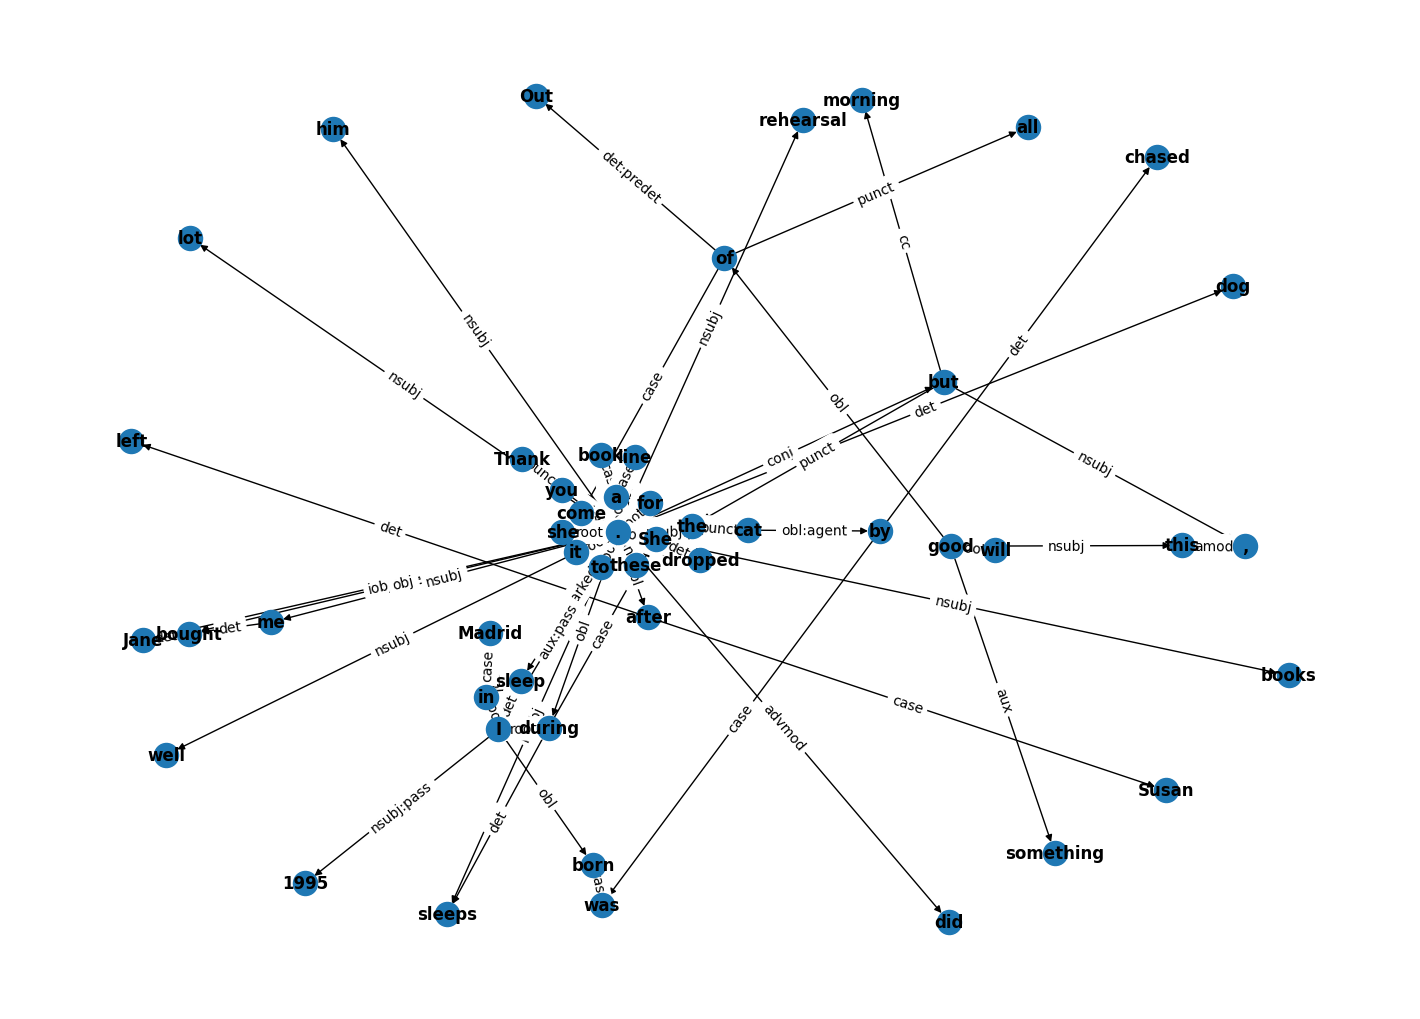

In [ ]:
# Crea un grafo vacío
G = nx.DiGraph()

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""
doc = nlp(text)

# Agrega los nodos (palabras) al grafo
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)
# Agrega las aristas (relaciones) al grafo
for sent in doc.sentences:
    for dep in sent.dependencies:
        # dep[0].id is the index of the governor (head) in the sentence, starting at 1
        # We need to subtract 1 to get the correct index in the list sent.words
        head = sent.words[dep[0].id - 3].text
        # Similar for the dependent word
        dep_word = sent.words[dep[2].id - 3].text
        rel = dep[1]  # dep[1] is the dependency type
        G.add_edge(head, dep_word, label=rel)


# Dibuja el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

In [ ]:
print("12.  Analiza el grafo de dependencias de un texto y devuelve su representación en JSON")

12.  Analiza el grafo de dependencias de un texto y devuelve su representación en JSON


In [ ]:
import stanza
import networkx as nx
import json

def analyze_dependency_graph(text):
  """
  Analiza el grafo de dependencias de un texto y devuelve su representación en JSON.

  Args:
      text: El texto de entrada.

  Returns:
      Un diccionario JSON que representa el grafo de dependencias.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  G = nx.DiGraph()

  # Agrega los nodos (palabras) al grafo
  for sent in doc.sentences:
    for word in sent.words:
      G.add_node(word.text, pos=word.upos)  # Agregar etiqueta POS como dato del nodo

  # Agrega las aristas (relaciones) al grafo
  for sent in doc.sentences:
    for dep in sent.dependencies:
      # Correct indexing for governor (head)
      head = sent.words[dep[0].id - 1].text  # Subtract 1 for correct index

      # Correct indexing for dependent word
      dep_word = sent.words[dep[2].id - 1].text  # Subtract 1 for correct index

      rel = dep[1]  # dep[1] is the dependency type
      G.add_edge(head, dep_word, label=rel)

  # Convertir el grafo a un diccionario JSON
  graph_json = {
      "nodes": [{"id": n, "label": n, "data": {"pos": G.nodes[n]["pos"]}} for n in G.nodes],
      "edges": [{"source": e[0], "target": e[1], "label": G.edges[e]["label"]} for e in G.edges]
  }

  return graph_json

# Example usage
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""

graph_json = analyze_dependency_graph(text)

# Puedes guardar el JSON en un archivo o procesarlo como necesites

# Guardar en un archivo (opcional)
with open('dependency_graph.json', 'w') as f:
  json.dump(graph_json, f, indent=4)

# Imprimir el JSON formateado
print(json.dumps(graph_json, indent=4))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


{
    "nodes": [
        {
            "id": "Jane",
            "label": "Jane",
            "data": {
                "pos": "PROPN"
            }
        },
        {
            "id": "bought",
            "label": "bought",
            "data": {
                "pos": "VERB"
            }
        },
        {
            "id": "me",
            "label": "me",
            "data": {
                "pos": "PRON"
            }
        },
        {
            "id": "these",
            "label": "these",
            "data": {
                "pos": "DET"
            }
        },
        {
            "id": "books",
            "label": "books",
            "data": {
                "pos": "NOUN"
            }
        },
        {
            "id": ".",
            "label": ".",
            "data": {
                "pos": "PUNCT"
            }
        },
        {
            "id": "a",
            "label": "a",
            "data": {
                "pos": "DET"
            }
        

In [ ]:
print("13.Analisis morfosintactico completo  del archivo input.txt en salida impresa y conversion a archivo json ")

13.Analisis morfosintactico completo  del archivo input.txt en salida impresa y conversion a archivo json 


In [ ]:
import stanza
import json

def analyze_sentence(sentence):
    """
    Realiza el análisis morfosintáctico completo de una oración utilizando Stanza.

    Args:
        sentence: La oración a analizar.

    Returns:
        Un diccionario con los resultados del análisis:
            - sentence: La oración original.
            - words: Una lista de diccionarios, donde cada diccionario representa una palabra
                     con información como texto, lema, POS, UPOS, feats, deprel, head.
    """
    nlp = stanza.Pipeline('en')
    doc = nlp(sentence)

    sentence_data = {
        "sentence": sentence,
        "words": []
    }

    for sent in doc.sentences:
        for word in sent.words:
            word_data = {
                "text": word.text,
                "lemma": word.lemma,
                "pos": word.pos,
                "upos": word.upos,
                "feats": word.feats,
                "deprel": word.deprel,
                "head": word.head
            }
            sentence_data["words"].append(word_data)

    return sentence_data

if __name__ == "__main__":
    sentences = [
        "Jane bought me these books.",
        "Jane bought a book for me.",
        "She dropped a line to him. Thank you.",
        "She sleeps.",
        "I sleep a lot.",
        "I was born in Madrid.",
        "the cat was chased by the dog.",
        "I was born in Madrid during 1995.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal. She did it well.",
        "She sleeps during the morning, but she sleeps."
    ]

    output = []
    for sentence in sentences:
        output.append(analyze_sentence(sentence))

    # Imprimir la salida (opcional)
    for entry in output:
        print(f"Sentence: {entry['sentence']}")
        print("Words:")
        for word in entry['words']:
            print(f"  - {word}")
        print()

    # Guardar la salida en un archivo JSON
    with open("morfosintactico_analysis.json", "w") as f:
        json.dump(output, f, indent=4)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off w

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence: Jane bought me these books.
Words:
  - {'text': 'Jane', 'lemma': 'Jane', 'pos': 'PROPN', 'upos': 'PROPN', 'feats': 'Number=Sing', 'deprel': 'nsubj', 'head': 2}
  - {'text': 'bought', 'lemma': 'buy', 'pos': 'VERB', 'upos': 'VERB', 'feats': 'Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin', 'deprel': 'root', 'head': 0}
  - {'text': 'me', 'lemma': 'I', 'pos': 'PRON', 'upos': 'PRON', 'feats': 'Case=Acc|Number=Sing|Person=1|PronType=Prs', 'deprel': 'iobj', 'head': 2}
  - {'text': 'these', 'lemma': 'this', 'pos': 'DET', 'upos': 'DET', 'feats': 'Number=Plur|PronType=Dem', 'deprel': 'det', 'head': 5}
  - {'text': 'books', 'lemma': 'book', 'pos': 'NOUN', 'upos': 'NOUN', 'feats': 'Number=Plur', 'deprel': 'obj', 'head': 2}
  - {'text': '.', 'lemma': '.', 'pos': 'PUNCT', 'upos': 'PUNCT', 'feats': None, 'deprel': 'punct', 'head': 2}

Sentence: Jane bought a book for me.
Words:
  - {'text': 'Jane', 'lemma': 'Jane', 'pos': 'PROPN', 'upos': 'PROPN', 'feats': 'Number=Sing', 'deprel': 'n

In [ ]:
print("14.Grafo del Analisis morfosintactico completo  del archivo input.txt en salida impresa y conversion a archivo json ")

14.Grafo del Analisis morfosintactico completo  del archivo input.txt en salida impresa y conversion a archivo json 


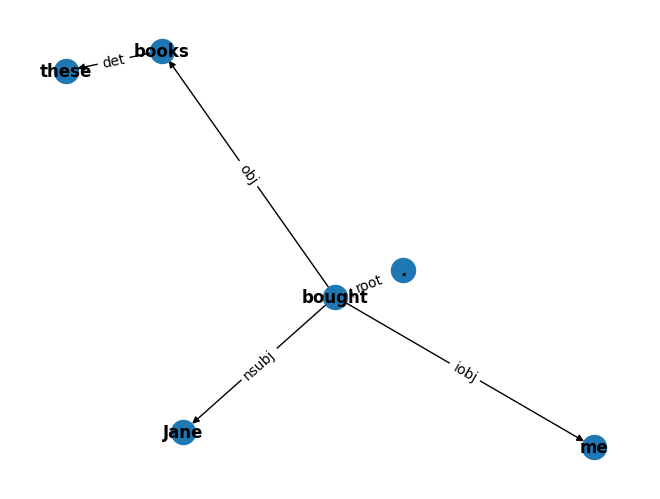

In [ ]:
import stanza
import networkx as nx
import json
import matplotlib.pyplot as plt

def visualize_dependency_graph(sentence_data):
    """
    Visualiza el grafo de dependencias para una oración dada.

    Args:
        sentence_data: Un diccionario que contiene la información de la oración,
                       incluyendo las palabras y sus relaciones.
    """

    G = nx.DiGraph()
    for word_data in sentence_data['words']:
        G.add_node(word_data['text'])
        head = word_data['head']
        head_text = sentence_data['words'][head - 1]['text']  # Ajustar por indexación basada en 0
        G.add_edge(head_text, word_data['text'], label=word_data['deprel'])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Cargar los datos del archivo JSON
with open('morfosintactico_analysis.json', 'r') as f:
    data = json.load(f)

# Visualizar el grafo de la primera oración (puedes iterar para todas las oraciones)
first_sentence_data = data[0]
visualize_dependency_graph(first_sentence_data)

In [ ]:
print("15.Tratamiento   del archivo input.txt con un  regex, para salida de output.json en salida impresa y conversion a archivo json ")

15.Tratamiento   del archivo input.txt con un  regex, para salida de output.json en salida impresa y conversion a archivo json 


In [ ]:
import stanza
import json

def analyze_sentences(sentences):
    """
    Analyzes a list of sentences using Stanza,
    extracts relevant information, and generates a JSON output.

    Args:
        sentences: A list of strings, each representing a sentence.

    Returns:
        A dictionary containing the analyzed data in JSON format.
    """

    nlp = stanza.Pipeline('en')  # Initialize Stanza pipeline for English

    data = {}
    for sentence in sentences:
        doc = nlp(sentence)
        for sent in doc.sentences:
            # Extract subject, verb, object, case, and complement
            subject = get_subject(sent)
            verb = get_verb(sent)
            obj = get_object(sent)
            case = get_case(sent)
            complement = get_complement(sent)

            # Determine sentence type based on presence of elements
            if obj and case and complement:
                sent_type = "NVNPN"
            elif obj:
                sent_type = "NVN"
            elif case and complement:
                sent_type = "NVPN"
            else:
                sent_type = "NV"

            # Create key for the dictionary
            key = f"{subject},{verb}"
            if obj:
                key += f",{obj}"
            if case:
                key += f",{case}"
            if complement:
                key += f",{complement}"

            # Add sentence to the dictionary
            if key not in data:
                data[key] = {
                    "sentences": [sentence],
                    "type": sent_type,
                    "count": 1,
                    "sbj": subject,
                    "vrb": verb,
                    "obj": obj,
                    "cas": case,
                    "com": complement
                }
            else:
                data[key]["sentences"].append(sentence)
                data[key]["count"] += 1

    return data

def get_subject(sent):
    """
    Extracts the subject of the sentence.
    """
    subject = None
    for word in sent.words:
        if word.xpos == "PRP" or word.xpos.startswith("NN"):
            subject = word.text
            break
    return subject

def get_verb(sent):
    """
    Extracts the main verb of the sentence.
    """
    verb = None
    for word in sent.words:
        if word.upos == "VERB":
            verb = word.text
            break
    return verb

def get_object(sent):
    """
    Extracts the direct object of the sentence.
    """
    obj = None
    for word in sent.words:
        if word.deprel == "obj":
            obj = word.text
            break
    return obj

def get_case(sent):
    """
    Extracts the case (preposition) of the sentence.
    """
    case = None
    for word in sent.words:
        if word.upos == "ADP":
            case = word.text
            break
    return case

def get_complement(sent):
    """
    Extracts the complement (noun phrase following the preposition) of the sentence.
    """
    complement = None
    for word in sent.words:
        if word.deprel == "pobj":
            complement = word.text
            break
    return complement

if __name__ == "__main__":
    sentences = [
        "I was born in Madrid.",
        "I was born in Madrid during 1995.",
        "She sleeps.",
        "She sleeps during the morning, but she sleeps.",
        "She dropped a line to him.",
        "The cat was chased by the dog.",
        "Out of all this , something good will come.",
        "Susan left after the rehearsal.",
        "I sleep a lot.",
        "She did it well.",
        "Jane bought me these books.",
        "Jane bought a book for me."
    ]

    result = analyze_sentences(sentences)

    # Print the results to the console
    for key, value in result.items():
        print(f"{key}:")
        print(f"  - Sentences: {', '.join(value['sentences'])}")
        print(f"  - Type: {value['type']}")
        print(f"  - Count: {value['count']}")
        print(f"  - Subject: {value['sbj']}")
        print(f"  - Verb: {value['vrb']}")
        print(f"  - Object: {value['obj']}")
        print(f"  - Case: {value['cas']}")
        print(f"  - Complement: {value['com']}")
        print()

    # Save the results to a JSON file
    with open("sentence_analysis.json", "w") as f:
        json.dump(result, f, indent=4)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


I,born,in:
  - Sentences: I was born in Madrid., I was born in Madrid during 1995.
  - Type: NV
  - Count: 2
  - Subject: I
  - Verb: born
  - Object: None
  - Case: in
  - Complement: None

She,sleeps:
  - Sentences: She sleeps.
  - Type: NV
  - Count: 1
  - Subject: She
  - Verb: sleeps
  - Object: None
  - Case: None
  - Complement: None

She,sleeps,during:
  - Sentences: She sleeps during the morning, but she sleeps.
  - Type: NV
  - Count: 1
  - Subject: She
  - Verb: sleeps
  - Object: None
  - Case: during
  - Complement: None

She,dropped,line,to:
  - Sentences: She dropped a line to him.
  - Type: NVN
  - Count: 1
  - Subject: She
  - Verb: dropped
  - Object: line
  - Case: to
  - Complement: None

cat,chased,by:
  - Sentences: The cat was chased by the dog.
  - Type: NV
  - Count: 1
  - Subject: cat
  - Verb: chased
  - Object: None
  - Case: by
  - Complement: None

something,come,Out:
  - Sentences: Out of all this , something good will come.
  - Type: NV
  - Count: 1
  - 

In [ ]:
print("16.Impresion del archivo output.json en salida impresa para comparacion  ")

15.Impresion del archivo output.json en salida impresa para comparacion  


In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 33.8 MB/s eta 0:00:00


In [ ]:
import stanza
import json
import urllib.request # Import the urllib.request module

# Carga el modelo de Stanza para inglés (ajusta según tu idioma)
nlp = stanza.Pipeline('en')

url = ("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/output.json")

# Define the read_url function using urllib.request.urlopen
def read_url(url):
  """Reads data from a URL and returns it as a string."""
  with urllib.request.urlopen(url) as response:
    data = response.read().decode('utf-8')  # Decode the response to a string
  return data


output = read_url(url)
# Carga el archivo JSON
# The downloaded data is in `output` variable as a string
#  Since it's expected to be JSON, you would need to load it
data = json.loads(output)
# Imprime el contenido en la consola
print(json.dumps(data, indent=4))

# Guarda el contenido en un nuevo archivo JSON
with open('output_nuevo.json', 'w') as f:
    json.dump(data, f, indent=4)

# Ejemplo de acceso a datos específicos (por ejemplo, la primera oración)
texto = data
print("texto:")
print(data)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


{
    "I, bear, in, CITY": {
        "sentences": [
            "I was born in Madrid.",
            "I was born in Madrid during 1995."
        ],
        "type": "NVPN",
        "count": 2,
        "sbj": "I",
        "vrb": "bear",
        "obj": null,
        "cas": "in",
        "com": "CITY"
    },
    "she, sleep": {
        "sentences": [
            "She sleeps.",
            "She sleeps during the morning, but she sleeps."
        ],
        "type": "NV",
        "count": 2,
        "sbj": "she",
        "vrb": "sleep",
        "obj": null,
        "cas": null,
        "com": null
    },
    "she, drop, line, to, he": {
        "sentences": [
            "She dropped a line to him."
        ],
        "type": "NVNPN",
        "count": 1,
        "sbj": "she",
        "vrb": "drop",
        "obj": "line",
        "cas": "to",
        "com": "he"
    },
    "cat, chase, by, dog": {
        "sentences": [
            "the cat was chased by the dog."
        ],
        "type": "N

In [ ]:
print("16.Impresion grafica de  dependencias, en salida impresa para comparacion  ")

16.Impresion grafica de  dependencias, en salida impresa para comparacion  


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


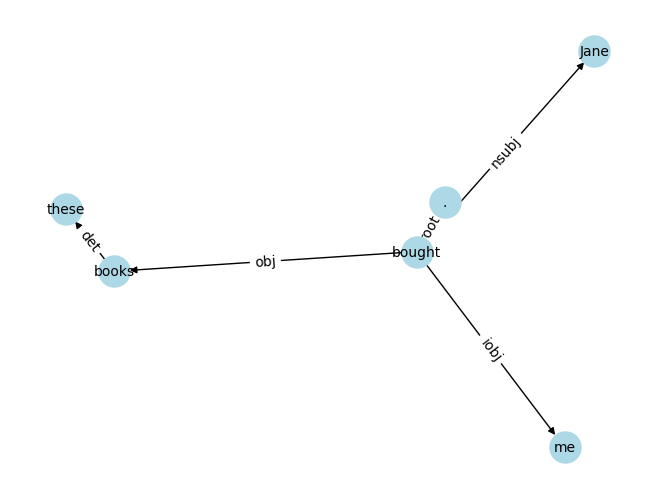

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


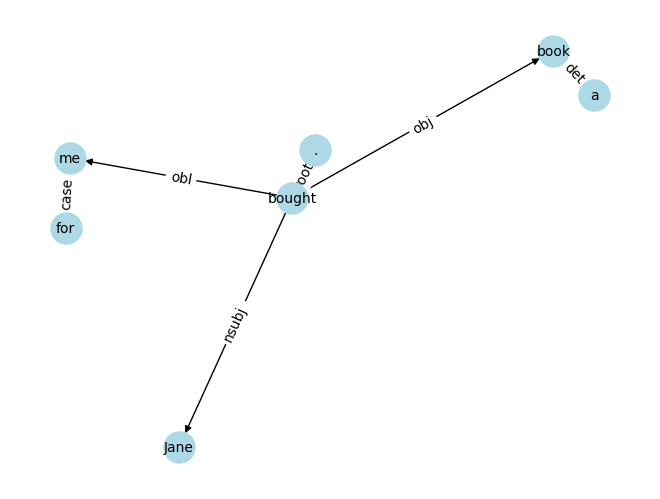

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


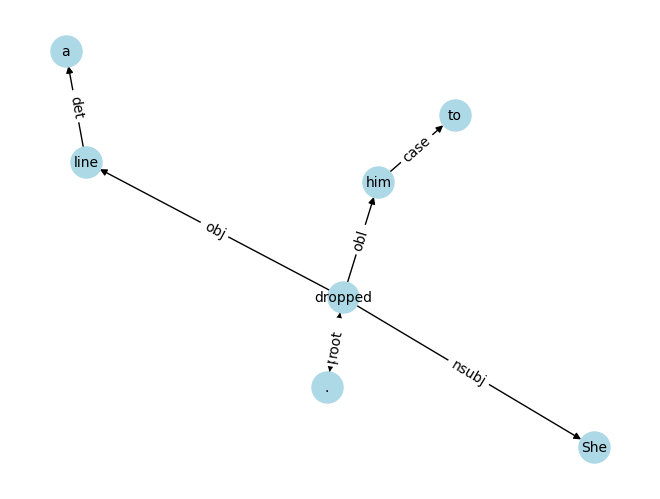

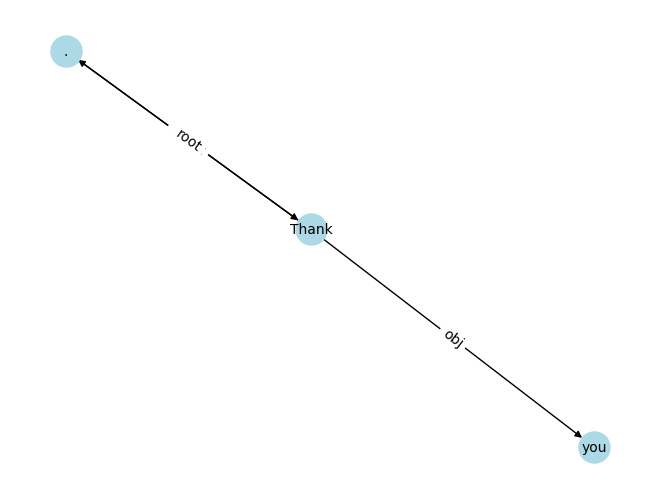

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


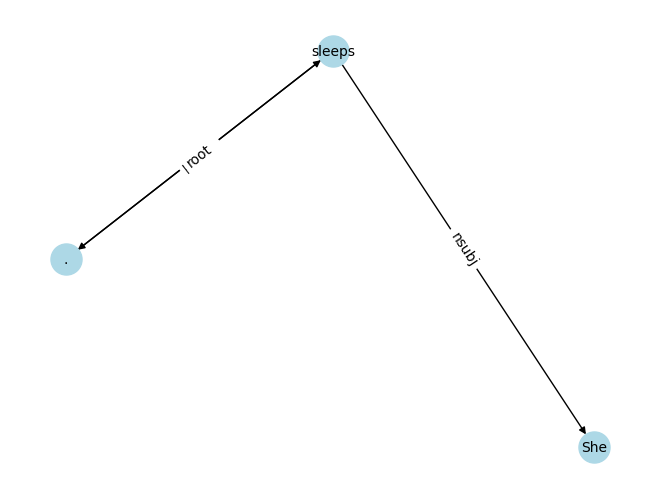

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


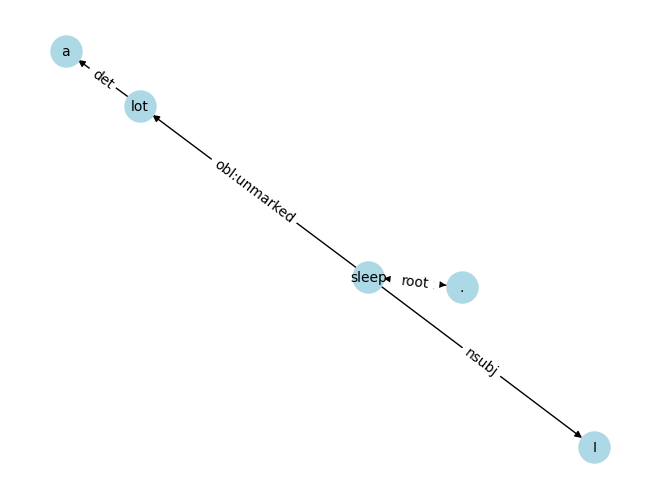

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


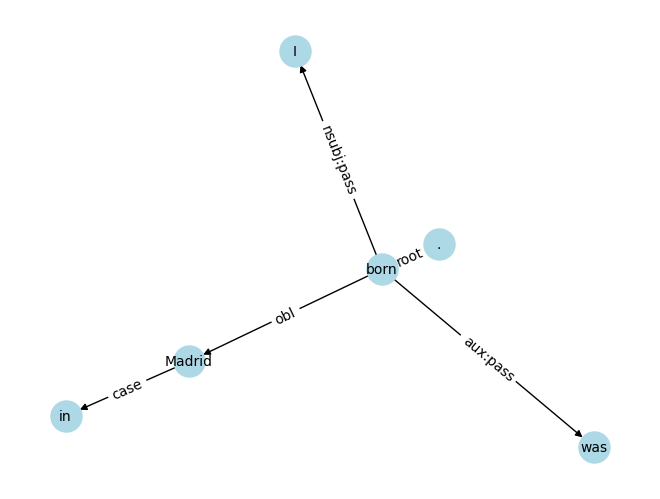

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


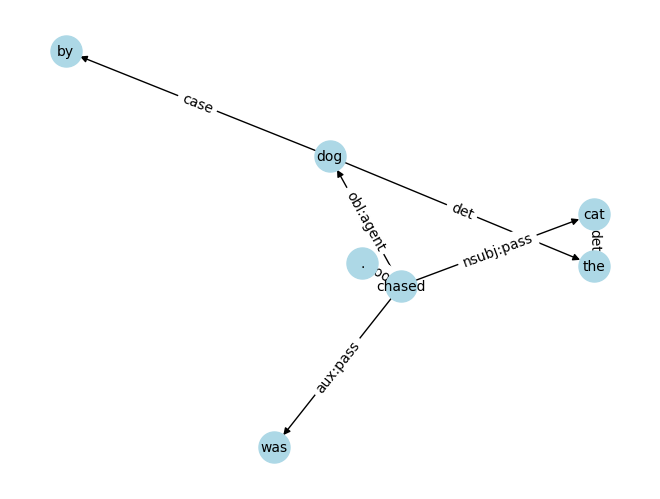

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


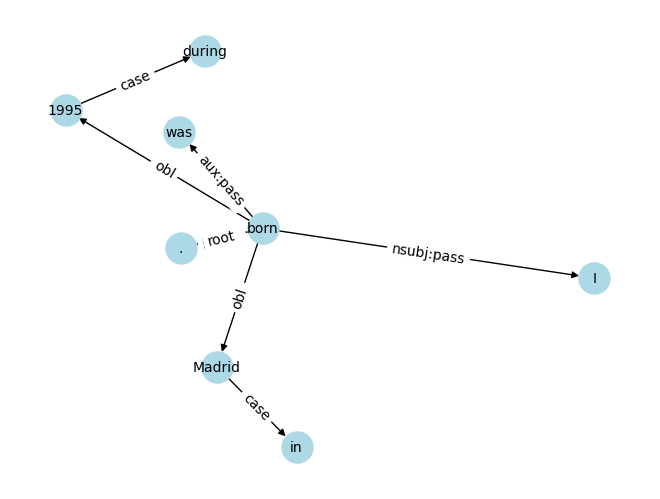

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


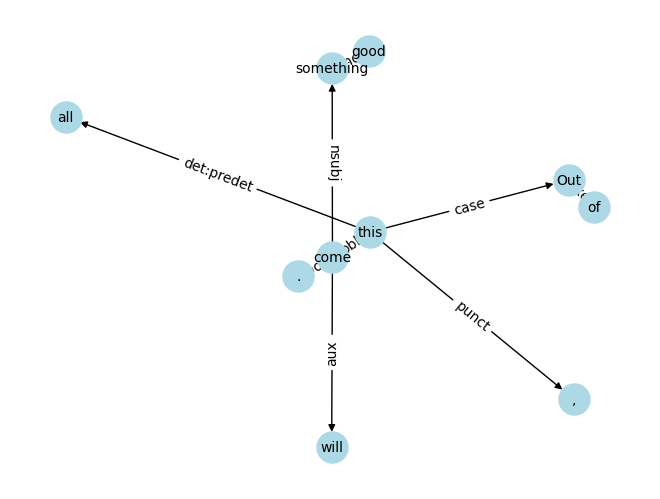

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


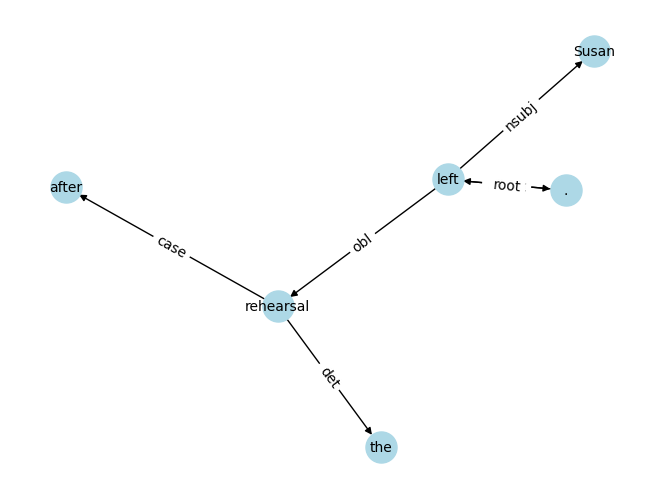

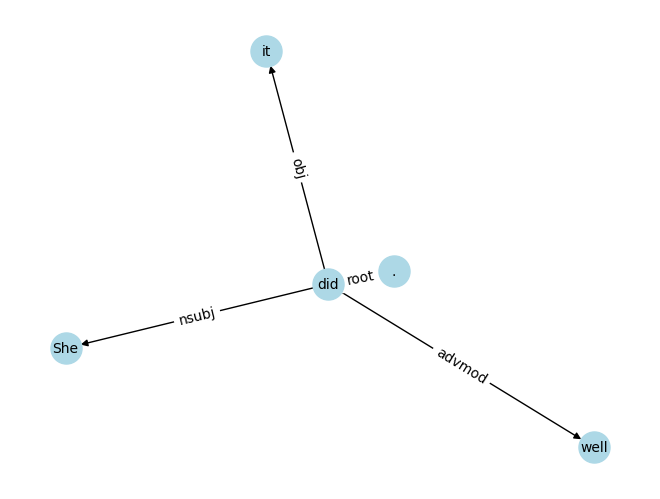

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


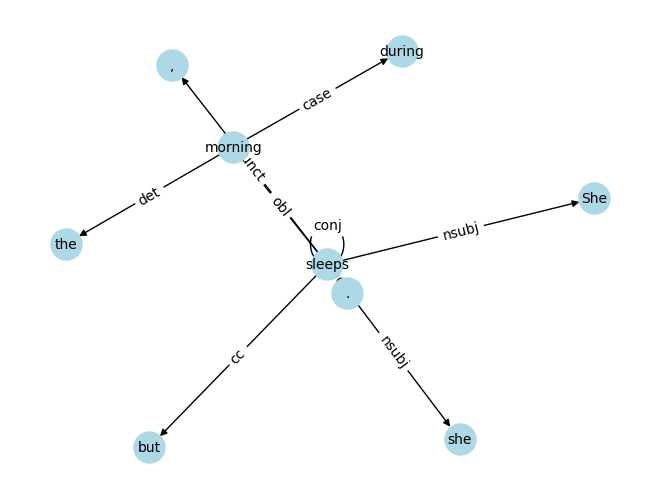

In [ ]:
import stanza
import matplotlib.pyplot as plt
import networkx as nx

def visualize_dependency_tree(text):
    """
    Visualiza el árbol de dependencias de una oración utilizando Stanza y NetworkX.

    Args:
        text: La oración a analizar.
    """
    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)

    for sent in doc.sentences:
        G = nx.DiGraph()

        for word in sent.words:
            G.add_node(word.text)

        for dep in sent.dependencies:
            governor = sent.words[dep[0].id - 1].text
            dependent = sent.words[dep[2].id - 1].text
            G.add_edge(governor, dependent, label=dep[1])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
        labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()

# Ejemplo de uso
sentences = [
    "Jane bought me these books.",
    "Jane bought a book for me.",
    "She dropped a line to him. Thank you.",
    "She sleeps.",
    "I sleep a lot.",
    "I was born in Madrid.",
    "the cat was chased by the dog.",
    "I was born in Madrid during 1995.",
    "Out of all this , something good will come.",
    "Susan left after the rehearsal. She did it well.",
    "She sleeps during the morning, but she sleeps."
]

for sentence in sentences:
    visualize_dependency_tree(sentence)